# Programming for Data Analysis Assignment

### Guidance notes to be deleted

It is not enough that you end up with a totally random dataset, you need to see which distribution might be most appropriate for that particular item. What are the likely data points that you collect from a phenomenon? How are the variables related to each other? What does the distribution look like? Is it a normal distribution? A Poisson distribution?

It is sufficient for the dataset to be a pandas dataframe, it doesn't need to be a CSV or XML file.

Brian: "So I'm not actually that interested in the actual data. What we're most interested in is the research investigations you do to create the dataset, because presumably there will be some random element in the generation of your data, following some sort of distribution. And I'll be able to re-run your notebook and get a different randomly-generated dataset with the same properties."

- types of variables and their distributions, relationships to each other
- simulate a second dataset based on the original dataset
- you don't need to store the generated data as a CSV, an output withing Jupy is sufficient, so the code could be re-run by the lecturer and produce a similar, but different, output
- most of the work will come in the investigation, as you've seen working with numPy and other packages, it only take a few commands to generate significant amounts of data
- you'll need to look at each variable and wonder what type of distribution it falls into

## Basic Plan

Could even be the amount of wins gained from winning the toss? Variables would be: toss result, choice of batting/fielding first, match result, total runs in the match. 

After this you'll need to show investigation of each variable, and plot them accordingly using NumPy or Seaborn to see if a distribution can be identified. Once these are identified, even just using [Wikipedia](https://en.wikipedia.org/wiki/Probability_distribution#External_links) or the [NumPy documentation](https://numpy.org/doc/stable/reference/random/generator.html), you'll need to use the latest notebooks from this module to simulate a dataset accordingly, so if you plot, say, expected goals, and you can see that the data is Poisson-distributed, you can use the `poisson` function in NumPy to generate the data.

Law: 

History: https://www.espncricinfo.com/story/cricket-s-turning-points-covered-pitches-461172

History: https://www.espncricinfo.com/wisdenalmanack/content/story/152416.html



In [1]:
# did you use all of these libraries?
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk

ash = pd.read_csv('eng_aus_data.csv')

## Rationale

Results in cricket matches between England and Australia since 1970, dependence on key variables:
- where is the match played?
- which team wins the toss?
- did that team decide to bat or field?
- what was the total first innings score?

The decision to choose this area to research was taken after reading the chapter "The Cat That Turned into a Fence" in Nathan Leamon and Ben Jones' _Hitting Against the Spin: How Cricket Really Works_ (2021, 172-197),

## Outline

The dataset, taken from CricInfo's [Statsguru](https://stats.espncricinfo.com/ci/engine/stats/index.html) query engine, details the match outcome of 153 five-day Test matches played between England and Australia in England, Wales and Australia since the 1st January, 1970. All but six of these matches (all taking place between 1977 and 1988) were contested as part of The Ashes, a bilateral series that alternates between the two countries approximately every two years. I have chosen 1970 as my start point as this was the period when groundsman at English cricket grounds were no longer permitted to leave pitches [uncovered](https://www.lords.org/mcc/the-laws-of-cricket/covering-the-pitch). Before this, pitches were not sheltered from any adverse weather once a match started, significantly affecting the conditions of the match, pitch quality, and captain's decisions at the toss, with Leamon and Jones (2021, 174-175) asserting that:

    "The vast majority (89 per cent) of captains who won the toss chose to bat, and this resulted in side who won the toss having a markedly better chance of winning."
    
Leamon and Jones argue that this tendency has proven hard to remove in the era of covered pitches, with conventional cricketing wisdom dictating that:

    "If you win the toss, nine times out of ten you should bat. On the tenth occasion you should think about bowling and then bat."
    
In fact, this hasn't been a sensible strategy in the modern game. They instead argue that in Tests occurring between 1980 and 2010,

    "...nearly twice as many captains have batted first than have chosen to bowl," and that "the side batting first  won 31 per cent of those Tests, and the side bowling first 36 per cent. The bat-first bias at the toss would seem to be neutral at best, and probably counter-productive."
    
Indeed, of the data I have extracted here, the team batting first won 42%, the team fielding first 32%, and the other 25% were drawn, figures that are strikingly close to the wider dataset that Leamon and Jones used.

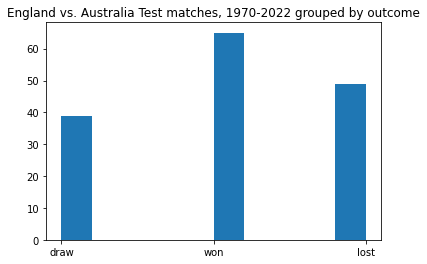

In [2]:
plt.hist(ash['outcome'])
plt.title("England vs. Australia Test matches, 1970-2022 grouped by outcome")
plt.show()

MORE INFORMATION HERE ABOUT AVERAGE SCORES PER INNINGS, SEE P177, ONE CHART PER VARIABLE, PERHAPS NOT JUST HISTOGRAMS

DIAGRAM OF TOSS RESULTS

DIAGRAM OF EACH INNINGS RESULTS

DIAGRAM OF WINNER

DIAGRAM OF OUTCOME

## Selection of Data    

Process: first pulled an innings-by-innings query, then I pulled a second and third query that filtered the results by tosses won by England and Australia respectively.

![image](.\Statsguru.png)

The variables I've chosen to include here are those that are often regarded as key points in the early stage of the match. In cricket, winning a coin toss offers a team's captain the choice of batting or fielding first, and captains will make this decision based on a number of factors, such as their team's strengths (or their opponent's weaknesses), the weather forecast, or the condition of the pitch. This choice is seen as an immediate advantage, and much pre-match discussion centres around what each captain's likely decision will be. For this reason, I've included the winner of the coin toss, as well as their choice, as variables. Of course, a coin toss is the classic example used for demonstrating binomial distribution, but while the decision to bat or field is a binary choice, it is far from binary. Leamon and Jones (2021, 175) state that:

    "In Tests played between 1980 and 2010, nearly twice as many captains have batted first than have chosen to bowl."

Does this dataset need more quantitative data? Perhaps second innings? Could pull four innings purely to show how average innings decline, reference the Adelaide graph on p. 177.

Any declared scores have been changed to a simple innings total to preserve the numeric dimension of the data. For the sake of cleanliness, games hosted in Cardiff list England as the host. Ties, an extremely rare occurrence in cricket, did not occur in a single one of the matches between the two countries in this dataset; indeed they have only occurred twice in the history of Test cricket since 1877, and are notable enough to have a separate [Wikipedia](https://en.wikipedia.org/wiki/Tied_Test) entry.

https://en.wikipedia.org/wiki/Result_(cricket)



In [3]:
ash[0:10]

,start,host,ground,team,toss,choice,inn1,inn2,inn3,inn4,winner,outcome,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,27/11/1970,Australia,Brisbane,Australia,Australia,Bat,433,464,214,39,draw,draw,NaN,NaN,NaN,NaN
1,11/12/1970,Australia,Perth,England,Australia,Field,397,440,287,100,draw,draw,NaN,NaN,NaN,NaN
2,09/01/1971,Australia,Sydney,England,England,Bat,332,236,319,116,England,won,NaN,NaN,NaN,NaN
3,21/01/1971,Australia,Melbourne,Australia,Australia,Bat,493,392,169,161,draw,draw,NaN,NaN,NaN,NaN
4,29/01/1971,Australia,Adelaide,England,England,Bat,470,235,233,328,draw,draw,NaN,NaN,NaN,NaN
5,12/02/1971,Australia,Sydney,England,Australia,Field,184,264,302,160,England,won,NaN,NaN,NaN,NaN
6,08/06/1972,England,Old Trafford,England,England,Bat,249,142,234,252,England,won,NaN,NaN,NaN,NaN
7,22/06/1972,England,Lord's,England,England,Bat,272,308,116,81,Australia,lost,NaN,NaN,NaN,NaN
8,13/07/1972,England,Trent Bridge,Australia,England,Field,315,189,324,290,draw,draw,NaN,NaN,NaN,NaN
9,27/07/1972,England,Headingley,Australia,Australia,Bat,146,263,136,21,England,lost,NaN,NaN,NaN,NaN


In [4]:
ash[:10]

,start,host,ground,team,toss,choice,inn1,inn2,inn3,inn4,winner,outcome,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,27/11/1970,Australia,Brisbane,Australia,Australia,Bat,433,464,214,39,draw,draw,NaN,NaN,NaN,NaN
1,11/12/1970,Australia,Perth,England,Australia,Field,397,440,287,100,draw,draw,NaN,NaN,NaN,NaN
2,09/01/1971,Australia,Sydney,England,England,Bat,332,236,319,116,England,won,NaN,NaN,NaN,NaN
3,21/01/1971,Australia,Melbourne,Australia,Australia,Bat,493,392,169,161,draw,draw,NaN,NaN,NaN,NaN
4,29/01/1971,Australia,Adelaide,England,England,Bat,470,235,233,328,draw,draw,NaN,NaN,NaN,NaN
5,12/02/1971,Australia,Sydney,England,Australia,Field,184,264,302,160,England,won,NaN,NaN,NaN,NaN
6,08/06/1972,England,Old Trafford,England,England,Bat,249,142,234,252,England,won,NaN,NaN,NaN,NaN
7,22/06/1972,England,Lord's,England,England,Bat,272,308,116,81,Australia,lost,NaN,NaN,NaN,NaN
8,13/07/1972,England,Trent Bridge,Australia,England,Field,315,189,324,290,draw,draw,NaN,NaN,NaN,NaN
9,27/07/1972,England,Headingley,Australia,Australia,Bat,146,263,136,21,England,lost,NaN,NaN,NaN,NaN


In [5]:
inns2 = ash[['choice','inn1','inn2','inn3','inn4']]
inns2

,choice,inn1,inn2,inn3,inn4
0,Bat,433,464,214,39
1,Field,397,440,287,100
2,Bat,332,236,319,116
3,Bat,493,392,169,161
4,Bat,470,235,233,328
...,...,...,...,...,...
148,Bat,147,425,297,20
149,Bat,473,236,230,192
150,Field,185,267,68,0
151,Bat,416,294,265,270


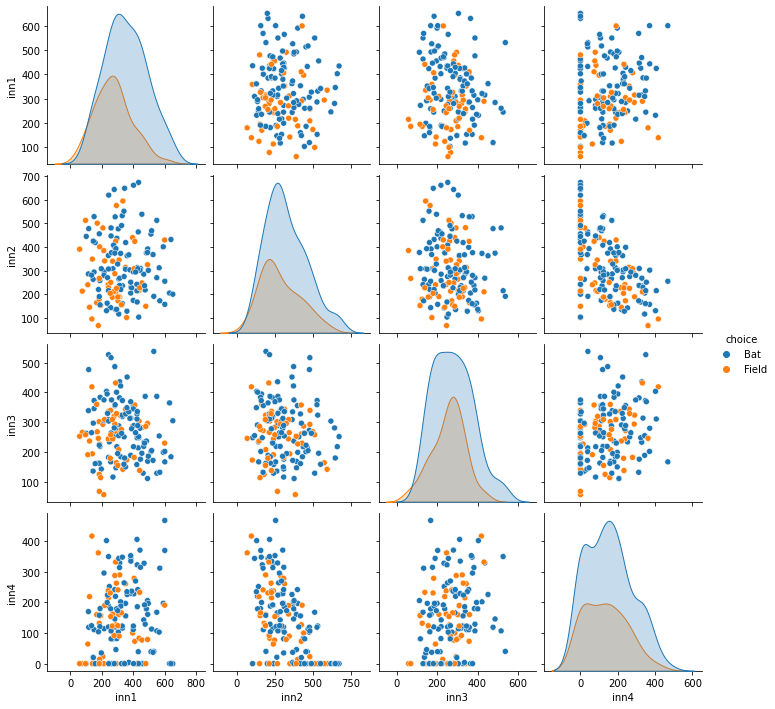

In [6]:
sns.pairplot(inns2,hue='choice')

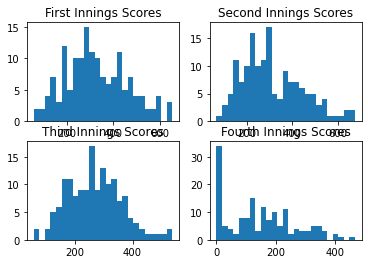

In [38]:
first = ash['inn1']
second = ash['inn2']
third = ash['inn3']
fourth = ash['inn4']

plt.subplot(2, 2, 1)
plt.title("First Innings Scores")
plt.hist(first, bins=25)

plt.subplot(2, 2, 2)
plt.title("Second Innings Scores")
plt.hist(second, bins=25)

plt.subplot(2, 2, 3)
plt.title("Third Innings Scores")
plt.hist(third, bins=25)

plt.subplot(2, 2, 4)
plt.title("Fourth Innings Scores")
plt.hist(fourth, bins=25)
plt.show()

plot toss, result separately?
Those four plots above would perhaps be better as a four lines overlaid each other